<font size="5">**2. Data Preprocessing**</font>

<font size="4">**2.1 Import Packages**</font>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

<font size="4">**2.2 Import Dataset**</font>

In [126]:
data = pd.read_csv("/Users/oliviama/Desktop/fraud_oracle.csv")

In [127]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


<font size="4">**2.3 Data Preprocessing**</font>

<font size="3.5">**2.3.1 Drop Irrelevant Columns**</font>

In [128]:
data = data.drop(columns=['PolicyNumber','RepNumber','Year'])

In [129]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


<font size="3.5">**2.3.2 Fill in Missing Values**</font>

In [130]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

<font size="4">**2.4 Variable Correlation**</font>

In [131]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.029741
WeekOfMonth          -0.011861
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.029741
WeekOfMonth          -0.011861
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


<AxesSubplot:>

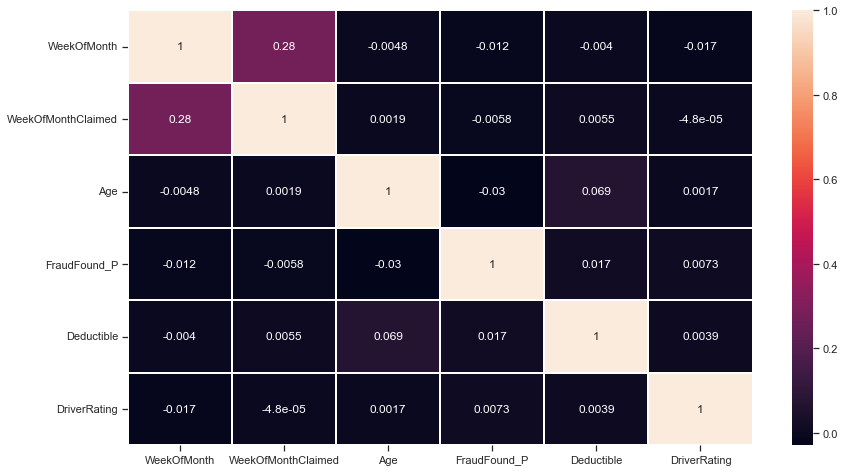

In [132]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

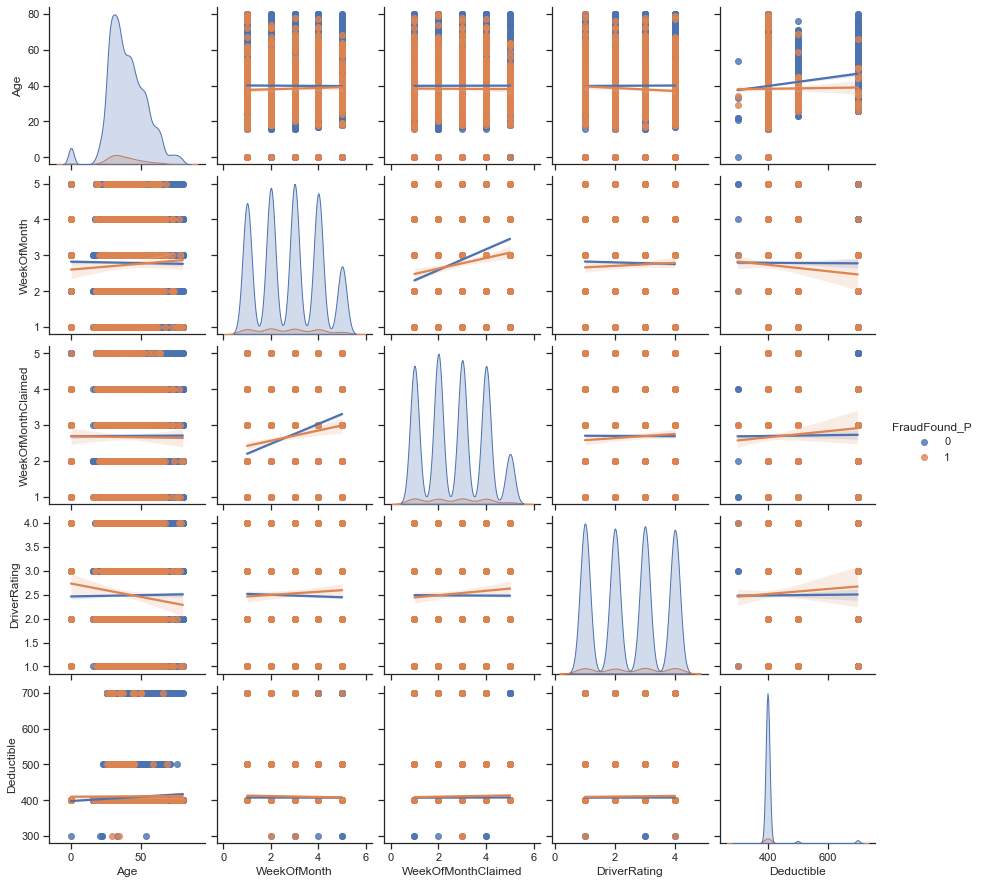

In [133]:
sns.set(style="ticks")

vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]

p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

<font size="4">**2.5.1 Specific data types of Columns**</font>

Text(0, 0.5, 'Data type')

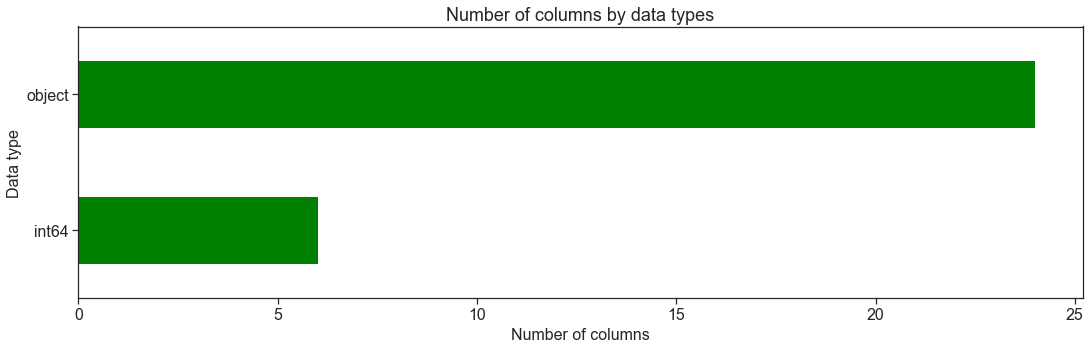

In [134]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

<font size="4">**2.5.2 Number of Categories for each object data**</font>

In [135]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

<font size="4">**2.5.3 Visualize Distribution of Categorical Variables**</font>

<AxesSubplot:xlabel='PoliceReportFiled', ylabel='FraudFound_P'>

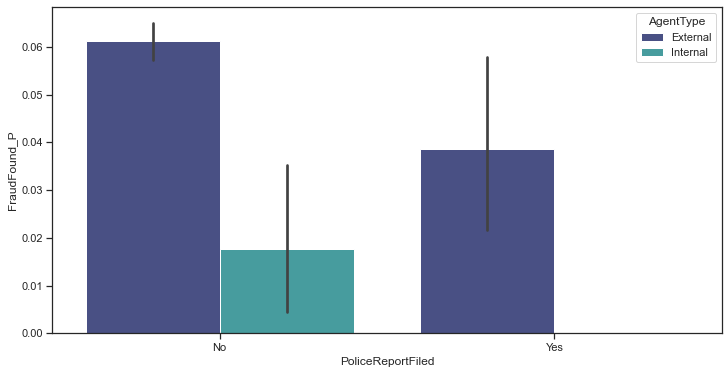

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

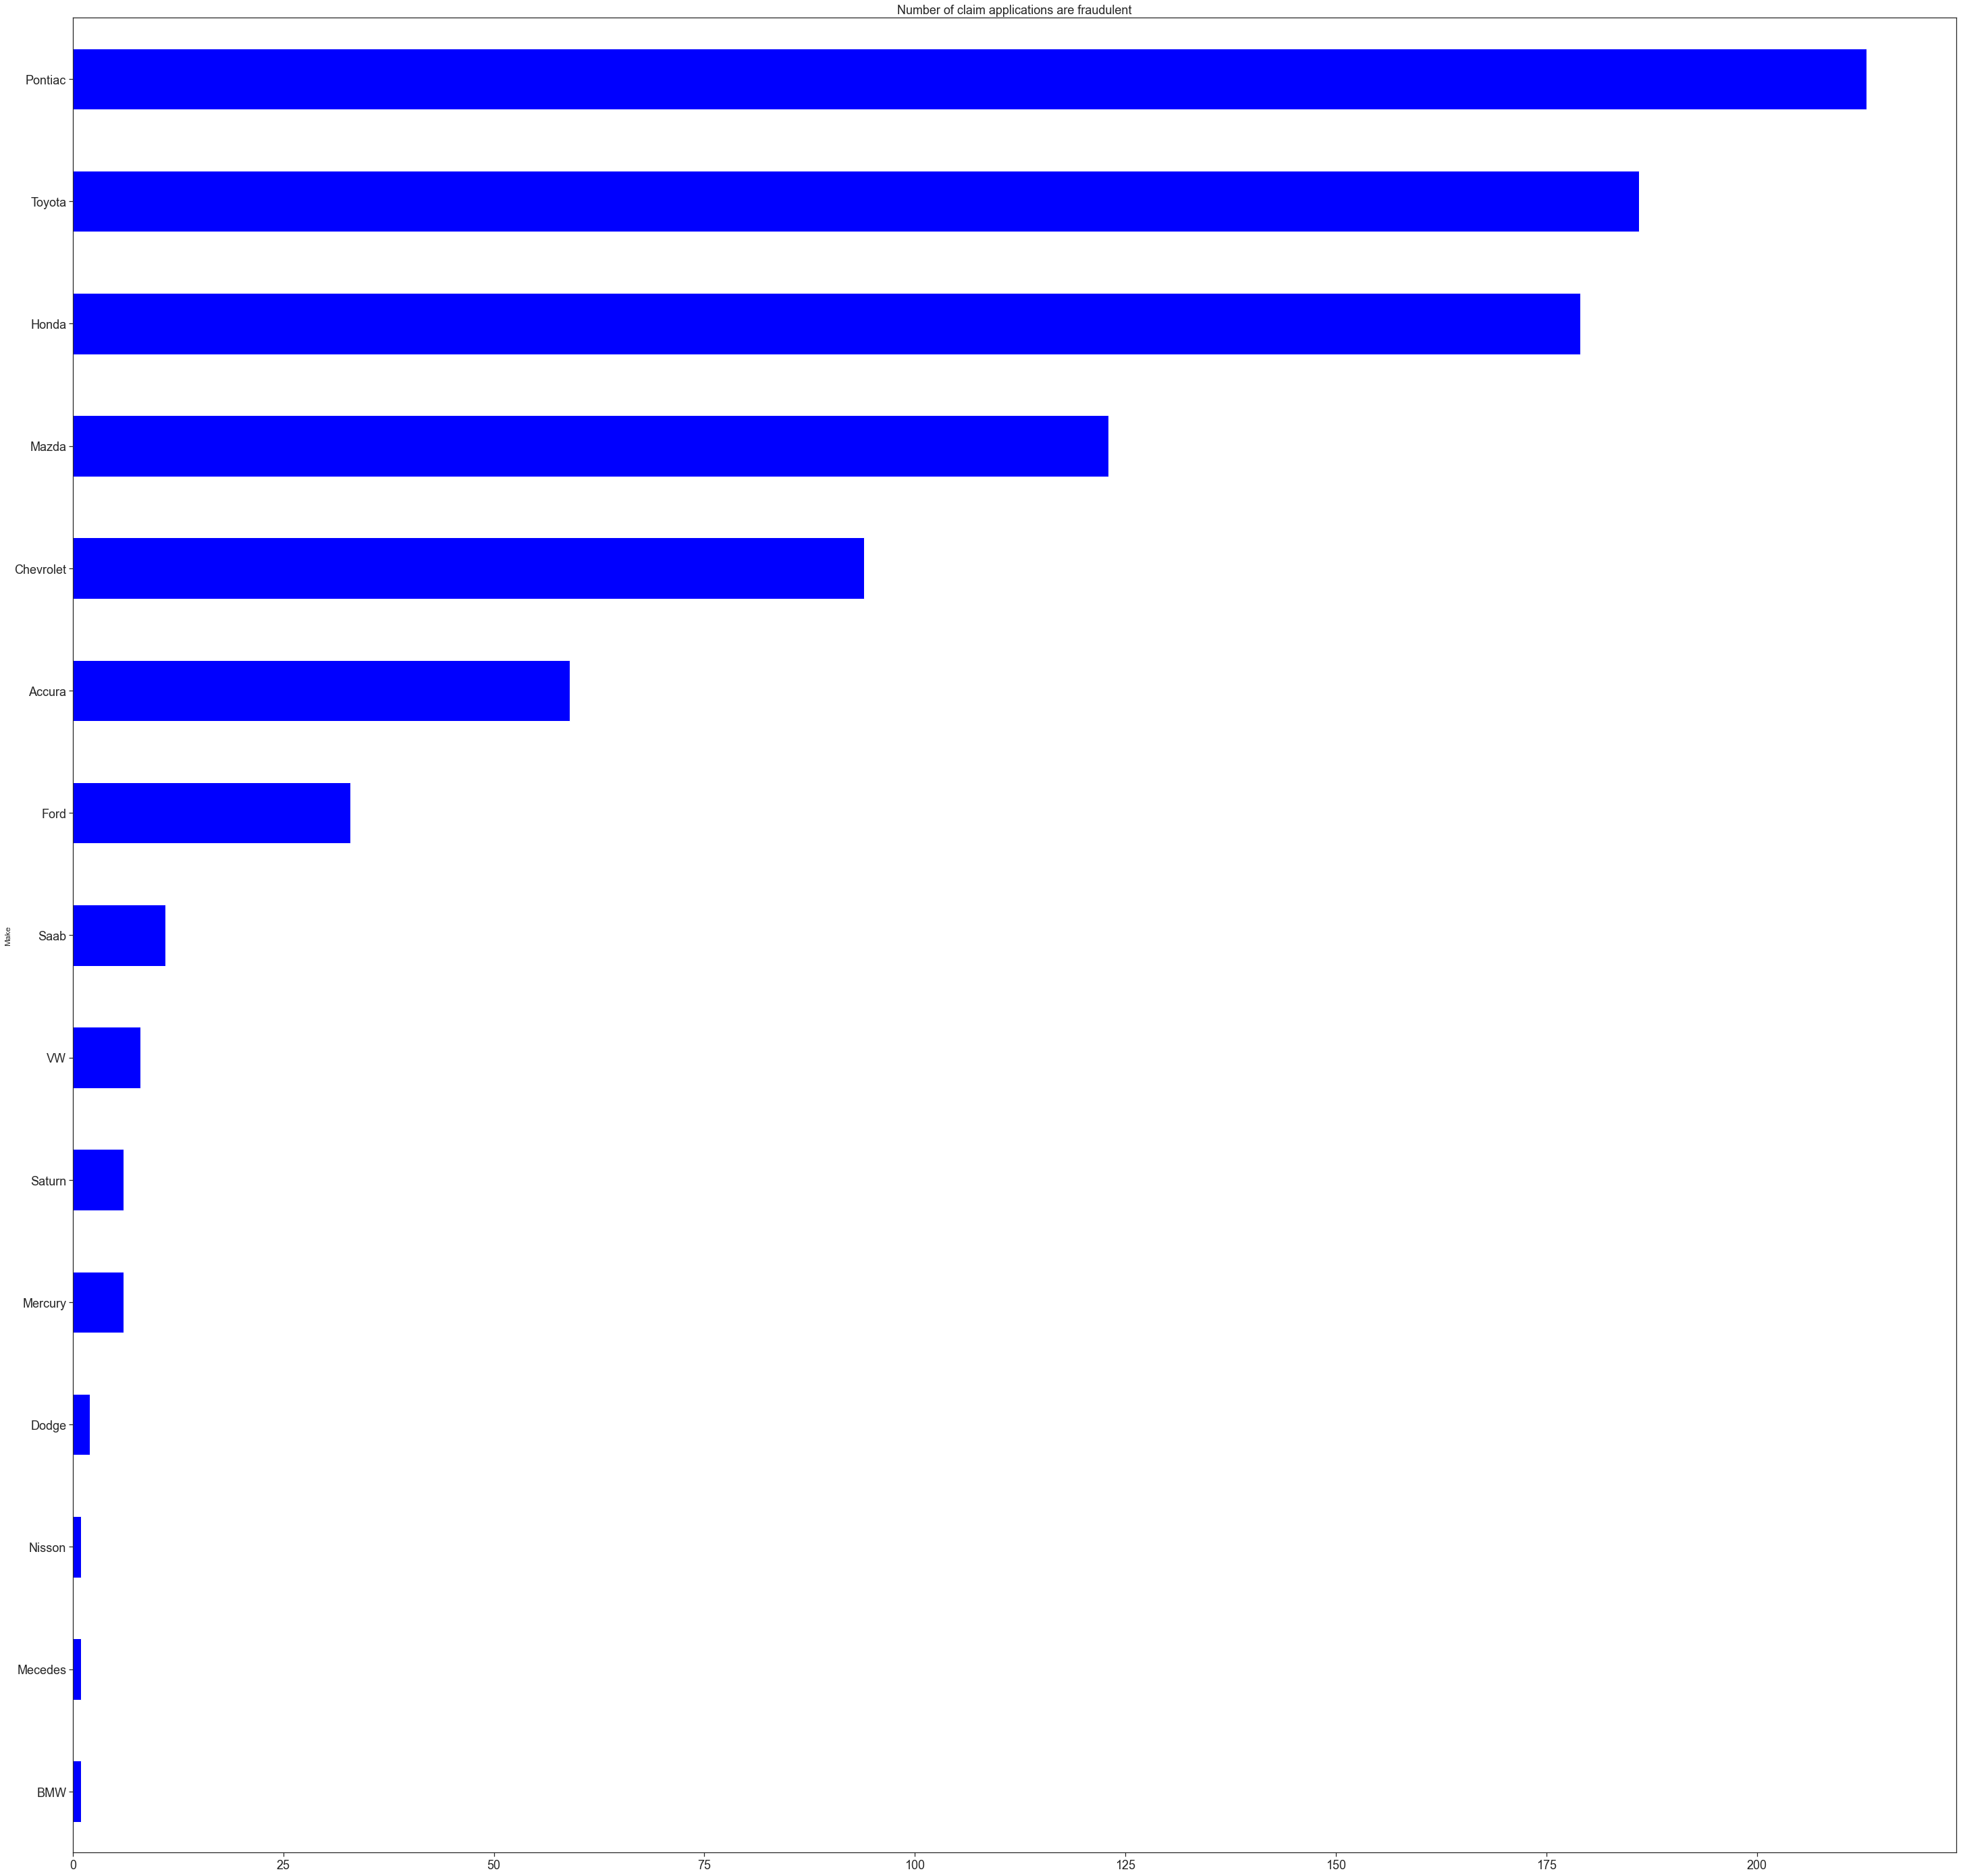

In [137]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=18, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=18)

<font size="4">**2.6.1 Encoding Categorical Variables**</font>

In [138]:
from sklearn.preprocessing import OrdinalEncoder

data_cat = data[['Month','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','MaritalStatus',
                 'PolicyType','VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars','BasePolicy']]

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [139]:
from sklearn import preprocessing

data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]

label_encoder = preprocessing.LabelEncoder() 
data_cat_label_encoded = data_cat_label.apply(lambda col: label_encoder.fit_transform(col))

In [140]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
data_cat_encoded_scaled = min_max_scaler.fit_transform(data_cat_encoded)
data_cat_label_encoded_scaled = min_max_scaler.fit_transform(data_cat_label_encoded)

data_cat_encoded_scaled = pd.DataFrame(data_cat_encoded_scaled,columns=['Month','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','MaritalStatus',
                 'PolicyType','VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars','BasePolicy'])
data_cat_label_encoded_scaled = pd.DataFrame(data_cat_label_encoded_scaled,
                                             columns=['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType'])

<font size="4">**2.6.2 Standardizing Numeric Variables**</font>

In [141]:
data_num = data[['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating']]
data_num_scaled = min_max_scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data_num_scaled,columns=['WeekOfMonth','WeekOfMonthClaimed','Age',
                                                        'Deductible','DriverRating'])                               

In [142]:
y = data[['FraudFound_P']]
y = pd.DataFrame(y,columns=['FraudFound_P'])
data = pd.concat([y,data_cat_encoded_scaled,data_cat_label_encoded,data_num_scaled], axis=1, join='inner')
data.head()

,FraudFound_P,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,...,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating
0,0,-0.636364,1.000000,-0.333333,0.714286,-0.166667,0.333333,0.25,0.0,1.0,...,0,0,0,0,0,1.0,-1.0,-0.475,-1.0,-1.000000
1,0,-0.272727,1.000000,-0.333333,-0.428571,-0.166667,0.333333,0.00,0.0,1.0,...,1,0,1,0,0,0.0,0.5,-0.150,-0.5,1.000000
2,0,0.818182,-1.000000,-0.333333,0.428571,0.666667,-0.333333,0.00,0.0,1.0,...,1,0,0,0,0,1.0,-0.5,0.175,-0.5,0.333333
3,0,0.090909,-0.333333,0.888889,-0.714286,0.000000,-0.333333,-0.50,0.0,-1.0,...,1,1,1,0,0,-0.5,-1.0,0.625,-0.5,-0.333333
4,0,-0.272727,-0.666667,-0.333333,0.714286,-0.333333,0.333333,0.00,0.0,1.0,...,0,1,0,0,0,1.0,-0.5,-0.325,-0.5,-1.000000


<font size="4">**2.7 Outlier Detection**</font>

Text(0.5, 1.0, 'The boxplot to study outliers')

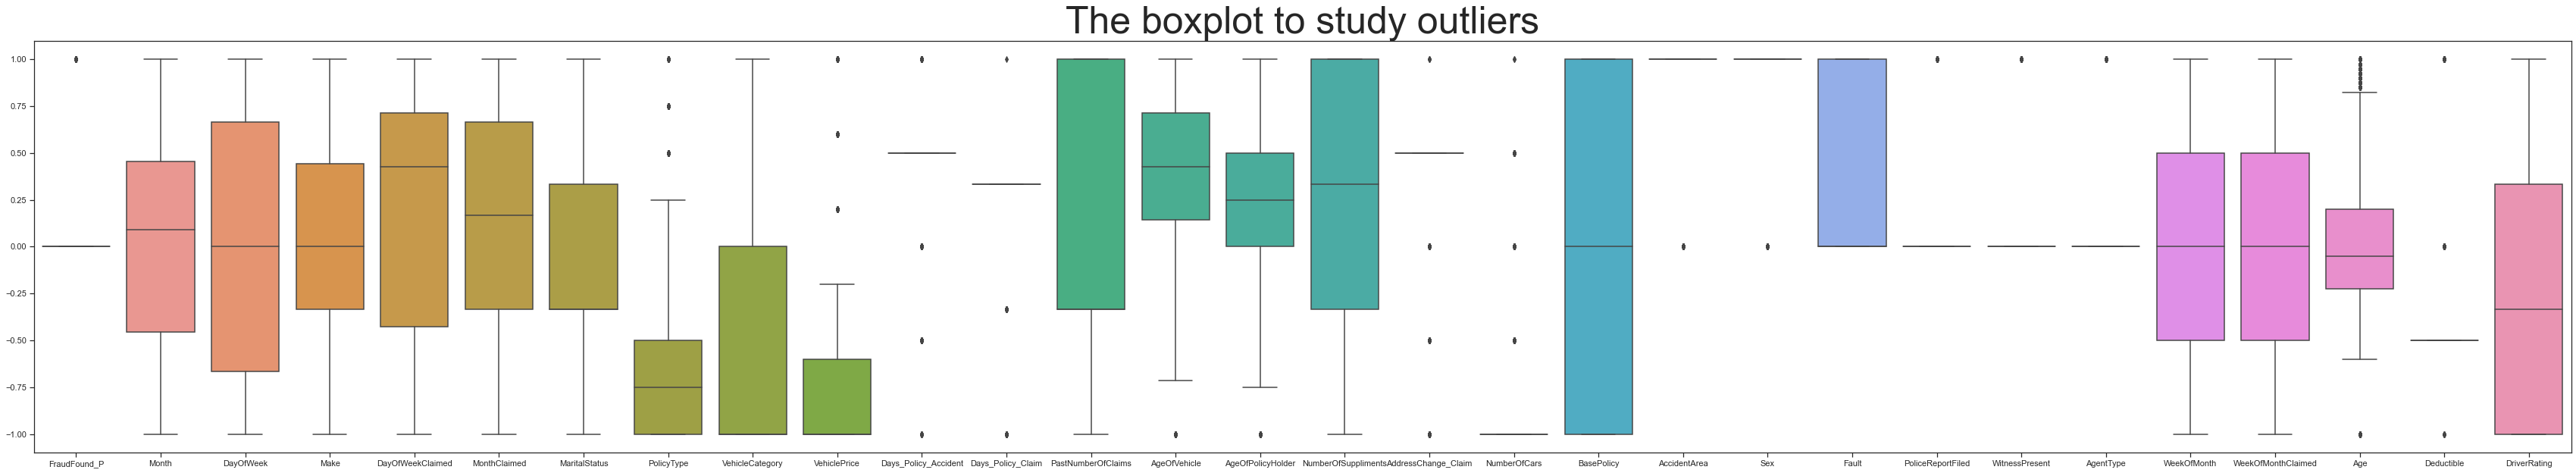

In [143]:
plt.figure(figsize=(60,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers',fontsize=50)

most outlier variables located in the "PolicyType","VehiclePrice"

In [144]:
from sklearn.ensemble import IsolationForest # Return the anomaly score 

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(data)
score = iforest.decision_function(data)

from numpy import where
anom_index = where(pred== -1)
values = data.iloc[anom_index]
values

/Users/oliviama/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,FraudFound_P,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,...,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating
0,0,-0.636364,1.000000,-0.333333,0.714286,-0.166667,0.333333,0.25,0.0,1.0,...,0,0,0,0,0,1.0,-1.0,-0.475,-1.0,-1.000000
13,0,-0.272727,-1.000000,-0.333333,1.000000,-0.333333,0.333333,-0.75,-1.0,1.0,...,1,1,0,0,0,1.0,-1.0,-1.000,-0.5,0.333333
28,1,-0.090909,-0.333333,-0.333333,0.714286,1.000000,0.333333,-1.00,-1.0,1.0,...,1,0,0,0,0,-1.0,0.5,-1.000,-0.5,-1.000000
52,1,-0.090909,0.000000,-0.333333,1.000000,-0.166667,-0.333333,0.00,0.0,1.0,...,1,0,0,0,0,0.0,0.5,-0.475,-0.5,1.000000
84,0,-0.636364,1.000000,-0.333333,-0.428571,-0.166667,0.333333,-0.50,0.0,1.0,...,1,0,0,0,0,-1.0,-1.0,-1.000,-0.5,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15120,1,0.818182,-1.000000,-0.777778,0.714286,0.833333,-0.333333,0.50,1.0,1.0,...,1,0,0,0,0,0.0,0.5,0.250,-0.5,0.333333
15239,0,0.818182,-1.000000,-0.777778,-0.428571,0.833333,-0.333333,-1.00,-1.0,1.0,...,0,1,1,0,0,0.5,1.0,-0.225,-0.5,-1.000000
15291,0,0.818182,-0.666667,-0.444444,0.428571,-0.166667,0.333333,0.50,1.0,1.0,...,1,0,0,0,0,-0.5,0.5,-0.400,-0.5,0.333333
15314,0,-0.272727,-0.333333,0.444444,-0.428571,-0.166667,0.333333,-0.50,0.0,0.6,...,0,0,0,0,0,1.0,1.0,0.175,1.0,1.000000


There are 309 outiliers detected.<br> Then remove the outliers

In [146]:
data = data[~data.index.isin(values.index)]
data.shape

(15111, 30)